# Proyek Analisis Data: E-commerce Publik
- **Nama:** Neli Fauziyah
- **NIM:** 33422018
- **Kelas:** IK-2A

## Menentukan Pertanyaan Bisnis

1. Kota mana yang memiliki pelanggan dan seller terbanyak?
2. Kota mana yang memiliki pelanggan dan seller paling sedikit?
3. Negara bagian mana yang memiliki pelanggan dan seller paling banyak?
4. Negara bagian mana yang memiliki pelanggan dan seller paling sedikit?
5. Berapa lama kelambatan waktu Approval order dilakukan?
6. Seberapa lambat durasi pengiriman setelah menerima order dilakukan?
7. Dari pengiriman-pengiriman order yang telah dilakukan, apakah pengiriman selalu datang kepada pelanggan tepat waktu sesuai perkiraan?

## Import Semua Packages/Library yang Digunakan

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [63]:
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [64]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [65]:
product_df = pd.read_csv("products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [66]:
sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Menilai tabel dataset customer

In [67]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [68]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [69]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [70]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel dataset order

In [71]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [72]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [73]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [74]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel dataset produk

In [75]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [76]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [77]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


In [78]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel dataset seller

In [79]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [80]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [81]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [82]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### Membersihkan tabel `customers_df`

In [83]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Berdasarkan informasi tipe data di atas, kita tidak perlu memperbaiki data. customer_id dan customer_unique_id memiliki isi data beragam (bukan hanya angka saja). Sehingga tipe object sesuai untuk customer_id dan customer_unique_id

#### Membersihkan tabel `orders_df`

In [84]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data pada order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date dimana seharusnya tipe data kolom-kolom di atas yaitu datetime

##### Memperbaiki tipe data

In [85]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                    "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [86]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Missing values

In [87]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [88]:
orders_df.loc[orders_df['order_approved_at'].isna() & orders_df['order_delivered_carrier_date'].isna() & orders_df['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Setelah melihat jumlah NaT, mari ubah data NaT pada kolom order_approved_at. Kita ambil data kolom order_purchase_timestamp untuk mengisi kolom NaT yang ada. Meskipun waktu pembelian order tidak sama dengan waktu persetujuan, itu masih memberikan titik referensi awal yang relevan dalam proses order.

In [89]:
orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)

Setelah memperbaiki kolom order_approved_at, mari kita perbaiki NaT pada kolom order_delivered_carrier_date. Mari kita gunakan data-data pada kolom order_purchase_timestamp untuk mengubah nilai NaT. Meskipun waktu pembelian order tidak sama dengan waktu pengiriman oleh perusahaan pengiriman, itu masih memberikan titik referensi awal yang relevan dalam proses pengiriman.

In [90]:
orders_df['order_delivered_carrier_date'].fillna(orders_df['order_purchase_timestamp'], inplace=True)

Terakhir, mari kita ubah NaT pada kolom order_delivered_customer_date dengan mengambil data-data dari kolom order_estimated_delivery_date. Meskipun waktu estimasi pengiriman tidak sama dengan waktu sebenarnya pelanggan menerima order, itu masih memberikan perkiraan kapan order seharusnya tiba.

In [91]:
orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'], inplace=True)

Mari kita cek kembali NaT pada orders_df

In [92]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [93]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


#### Membersihkan tabel `product_df`

##### Missing values

In [94]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Dari hasil di atas, kita tahu bahwa product_categori_name dan product_name_lenght dan product_description_lenght serta product_photos_qty memiliki jumlah NaN yang sama. Hal ini dikarenakan faktor menjelaskan bahwa informasi seperti kategori produk, panjang nama produk, panjang deskripsi produk, serta foto puduk memiliki 610 data yang masih kosong atau tidak diketahui.

Sama halnya pula dengan berat, panjang, lebar dan tinggi produk memiliki 2 data yang masih kosong atau tidak diketahui.

Karena kesamaan angka tersebut, mari kita cek hanya bagian produk_category_name terlebih dahulu

In [95]:
product_df.loc[product_df['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Dari hasil di atas, masih tidak terlihat NaN pada berat, panjang, lebar dan tinggi produk.

In [96]:
product_df.loc[product_df['product_weight_g'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dapat kita lihat bahwa untuk 2 data NaN pada berat, panjang, lebar dan tinggi produk, salah satunya merupakan bagian id yang sama dengan 610 data NaN dari nama kategori.

Kita perlu menghilangkan nilai NaN dan menggantinya dengan sesuatu yang lain. Mari kita cek kembali tipe-tipe data tiap kolom.

In [97]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Semua tipe data dari NaN memiliki tipe data float, kecuali kolom product_category_name yang memiliki tipe data objek. Maka data NaN product_category_name akan kita ubah menjadi "Unknown" sedangkan untuk kolom lainnya, kita ubah menjadi angka 0.

In [98]:
product_df.fillna(value={'product_category_name': 'Unknown', 'product_name_lenght': 0, 'product_description_lenght': 0,
                         'product_photos_qty': 0, 'product_weight_g': 0, 'product_length_cm': 0, 'product_height_cm': 0,
                         'product_width_cm': 0}, inplace=True)

In [99]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [100]:
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Membersihkan tabel `sellers_df`

In [101]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Berdasarkan informasi tipe data di atas, kita tidak perlu memperbaiki data. customer_id memiliki isi data beragam (bukan hanya angka saja). Sehingga tipe object sesuai untuk customer_id.

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [102]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
32282,59b5afd367220e7d7e8b23cf010e44c7,7ef6d1de203a99ee62a7d14e5329668d,76824,porto velho,RO
78456,302236291b9fcf26861aa5305cdc0903,1e2b9640573092012db0906fd256112c,95110,caxias do sul,RS
47325,0fb2d5ea71450c62f5a0c94c0fb18de9,19f5169a88039aec61a15afe2b1b4e65,11471,guaruja,SP
46347,e4da40842c77acf1d600712d8ddff94e,a14dcb24100b7709b3fd1d3a927f3c66,20520,rio de janeiro,RJ
55519,363c2e47fb53ec36998ad4b232a12952,8a608527884b368073a4f2040ec0b3f0,22230,rio de janeiro,RJ


Pertama, kita akan mengeksplorasi data customers_df terlebih dahulu. Seperti yang kita ketahui, dataset ini memuat berbagai informasi terkait customer, seperti customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, dan customer_state.

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data customers_df menggunakan method *describe()*.

In [103]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, kita memperoleh informasi jumlah pelanggan sebanyak **99441** orang. Kita juga memperoleh informasi dimana mayoritas pelanggan berasal dari kota **sao paulo** dalam negara bagian **SP** atau **São Paulo** yang dimana terletak pada negara **Brazil**. Informasi ini dapat memberikan gambaran mengenai distribusi pelanggan di berbagai kota dan negara.

In [104]:
customers_df.customer_id.is_unique

True

In [105]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

Sekarang coba kita lihat demografi pelanggan berdasarkan kota (city). Untuk melakukan ini, kita akan menggunakan method *groupby()* yang diikuti dengan method *agg()*. Selain itu, agar hasilnya lebih mudah untuk dilihat, kita akan mengurutkan nilainya menggunakan method sort_values() secara descending.

In [106]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [107]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Analisis terhadap hasil menunjukkan adanya **ketidakmerataan dalam persebaran pelanggan di berbagai kota dan negara bagian**. **Kota São Paulo** menonjol sebagai pusat populasi pelanggan terbesar, dengan total **15.540 pelanggan**. Di sisi lain, beberapa kota seperti **Ibiara, Rio Espera, Rio dos Índios, Rio dos Cedros, dan Lagoão** hanya memiliki **satu pelanggan**.

Selain itu, perhatian juga tertuju pada dominasi pelanggan yang berasal dari **negara bagian São Paulo (SP)**. Mayoritas pelanggan kita berasal dari negara bagian São Paulo, menunjukkan keberadaan pangsa pasar yang kuat di wilayah tersebut.

Ini menggambarkan perbedaan signifikan dalam distribusi pelanggan antar kota dan negara bagian, yang bisa menjadi pertimbangan penting dalam pengambilan keputusan bisnis, seperti alokasi sumber daya pemasaran dan strategi ekspansi.

### Explore `orders_df`

Data kedua yang akan kita eksplor adalah orders_df. Ia mengandung berbagai informasi terkait sebuah order yang terdiri dari order_id, customer_id,order_status, order_purchase_timestamp, order_approved_at order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

In [108]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
63890,ad0d46c22c5a9dd2699f5142b1882f5f,37be731e9a59816c2139b344f51147dc,delivered,2017-02-05 17:55:05,2017-02-05 18:05:20,2017-02-09 16:29:43,2017-02-10 06:44:41,2017-03-06
52909,f04ae1f604432b5ac75c8a2a2e42b548,1dfda6ce0678db7db39fd97a27aafcba,delivered,2017-11-15 18:25:57,2017-11-17 04:26:10,2017-11-18 01:08:37,2017-11-23 21:26:53,2017-12-06
5864,4cfaef0e608d086a42b2ab2d089419fb,4f928b8251b656808a61dc113d912888,delivered,2017-11-28 19:24:34,2017-11-28 19:35:48,2017-12-06 12:09:34,2017-12-21 15:03:31,2017-12-21
14844,8b17d9b0ca1fcef1952990014a1e099f,60d3d696d3ad1aa3bc4e6727abea6824,delivered,2017-10-03 12:57:30,2017-10-05 02:49:16,2017-10-09 21:36:00,2017-10-18 20:11:51,2017-11-01
22514,bceae68488231cae8418713a4f1a5a99,2c3a6ec473549cb156fcf3756a60cbd6,delivered,2017-09-26 12:02:18,2017-09-26 12:14:21,2017-09-27 18:20:23,2017-10-18 22:10:30,2017-10-20


Berdasarkan informasi tersebut, kita bisa membuat sebuah kolom baru untuk memuat durasi persetujuan order. Untuk melakukannya, kita perlu menghitung selisih antar **order_purchase_timestamp** dan **order_approved_at** serta menyimpannya sebagai **order_approval_time**. Selanjutnya, kita akan menggunakan method *apply()* untuk melakukan sebuah operasi terhadap setiap elemen dalam sebuah kolom DataFrame atau Series (bentuk satu dimensi dari DataFrame). Operasi yang akan kita lakukan ialah menghitung jumlah detik dari **order_approval_time** menggunakan method *total_seconds()*. Nilai tersebut selanjutnya diubah ke dalam satuan hari (dibagi 86400) dan diambil bilangan bulatnya saja

In [109]:
order_approval_time = orders_df["order_approved_at"] - orders_df["order_purchase_timestamp"]
order_approval_time = order_approval_time.apply(lambda x: x.total_seconds())
orders_df["order_approval_time"] = round(order_approval_time/86400)

In [110]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approval_time
87864,0f28d51fdd4828907bdc58b57f672e84,bc4011fd2a5106761b5ba943c8fbd1b2,delivered,2018-02-17 15:54:49,2018-02-17 16:06:43,2018-02-21 17:39:16,2018-03-08 17:58:42,2018-03-13,0.0
72907,9b4115e477837d876755fb7982d10be6,eb99eaaa3f61bd19664639eaf9be9c7a,delivered,2017-11-30 16:11:39,2017-11-30 16:18:21,2017-12-05 21:41:27,2017-12-15 17:47:15,2017-12-28,0.0
61359,9b7e31b52614093d8662625b545aad40,662bd2ea971f732c950391bcdec84eda,delivered,2018-01-12 21:55:37,2018-01-12 22:27:57,2018-01-19 01:58:57,2018-01-27 00:41:34,2018-02-07,0.0
87516,eb5601a8a1f6ef9ce717d9862bc78722,0ffce45bf9ee56cc2fd80f6a1ebf68fb,delivered,2018-02-08 08:40:42,2018-02-09 10:11:46,2018-02-09 19:28:46,2018-02-21 21:16:46,2018-03-06,1.0
44346,342dfdaa2bf160f340fa0e54781e5b09,b6cd2f3aa040216ee50c6d1347aff1a5,delivered,2017-11-11 16:01:34,2017-11-11 16:15:30,2017-11-17 01:14:55,2017-11-25 00:07:49,2017-12-11,0.0


Hasil perhitungan di atas menampilkan jarak atau selisih berapa hari dari pembelian order dan persetujuan order.

Kemudian, mari kita tambahkan kolom **order_delivery_duration** yang merupakan durasi antara waktu **order dikirim oleh pengirim (order_delivered_carrier_date)** dan **waktu diterimanya oleh pelanggan (order_delivered_customer_date)**

In [111]:
order_delivery_duration = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
order_delivery_duration = order_delivery_duration.apply(lambda x: x.total_seconds())
orders_df["order_delivery_duration"] = round(order_delivery_duration/86400)

In [112]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approval_time,order_delivery_duration
50883,ce89a61d7fb824d1eb7e05915b912a65,1728ec067e65bce5ecb559680e0d522f,delivered,2017-05-14 21:49:56,2017-05-14 22:05:15,2017-05-16 10:19:00,2017-06-01 12:33:02,2017-06-08,0.0,16.0
15809,317cb7f3391660e97cfeaa2ca5927df0,60f1dec678126bd21045e15d68774953,delivered,2017-11-24 18:25:17,2017-11-24 21:36:59,2017-11-27 20:32:10,2017-12-02 12:22:47,2017-12-20,0.0,5.0
53483,50852bd4d7074310017db9d4b0e243b3,4680a04d4d7c08a0fecc1ea9bfcc997f,delivered,2018-04-21 15:51:17,2018-04-24 17:59:38,2018-04-24 19:31:23,2018-05-10 23:03:40,2018-05-25,3.0,16.0
29677,adf766a719fd52b485fa2127fa0dd9a7,aa62a16b10e3fb24ecdefd7e4dc3fa65,delivered,2018-06-24 14:37:17,2018-06-24 14:55:00,2018-06-25 12:09:00,2018-06-29 20:41:48,2018-07-20,0.0,4.0
18842,4e389f96f2675b7c829d5f9bc2d9fd70,dd60c1a003b6f0c58d37985262256096,delivered,2018-01-16 12:12:33,2018-01-17 12:10:11,2018-01-18 16:37:39,2018-01-30 19:35:23,2018-02-14,1.0,12.0


Hasil perhitungan di atas, menampilkan jarak atau durasi berapa hari pengiriman order dan penerimaan order oleh pelanggan.

Selanjutnya, mari kita tambahkan kolom order_delivery_delay untuk melihat keterlambatan/ketepatan pengiriman dari perhitungan selisih order_delivered_customer_date dan order_estimated_delivery_date.

In [113]:
order_delivery_delay = orders_df["order_delivered_customer_date"] - orders_df["order_estimated_delivery_date"]
order_delivery_delay = order_delivery_delay.apply(lambda x: x.total_seconds())
orders_df["order_delivery_delay"] = round(order_delivery_delay/86400)

In [114]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approval_time,order_delivery_duration,order_delivery_delay
67337,26343e0890fb597a7d91a607455a44fa,1f2c60e23c801c60338999c38d60edf9,delivered,2018-04-23 09:30:14,2018-04-24 17:29:34,2018-05-02 09:51:00,2018-05-15 18:04:57,2018-05-11,1.0,13.0,5.0
59649,b9b7f9bddf7affffff1c6da14e8144b0,a46d903e312bcaabd937e93363cae46a,delivered,2018-01-10 22:20:37,2018-01-10 22:33:46,2018-01-17 14:27:11,2018-02-03 07:12:40,2018-02-09,0.0,17.0,-6.0
46994,cc70bdcbdc96a3800ea3cecdc98b1a72,0563e58ea5bb08719e7c7016e1d6b800,delivered,2018-06-15 21:12:07,2018-06-18 11:42:08,2018-06-19 06:16:00,2018-06-22 21:36:38,2018-07-12,3.0,4.0,-19.0
5104,32b88a9584e3facf4a7eda6c22b11219,e9a09c7c5f699f95b7bae10f94cac398,delivered,2017-12-05 15:26:00,2017-12-05 16:30:58,2017-12-06 14:57:06,2017-12-18 23:23:54,2018-01-05,0.0,12.0,-17.0
70585,963ac22d582d11d2bef4a834a74ddaf8,dbdb8deabd16936733388daf58e81b02,delivered,2017-10-17 18:50:47,2017-10-17 19:36:16,2017-10-18 12:08:08,2017-10-24 21:57:43,2017-11-06,0.0,6.0,-12.0


Dari hasil perhitungan di atas, jika menghasilkan nilai minus maka pengiriman order mengalami keterlambatan. Sedangkan jika menghasilkan nilai angka biasa (selain angka 0 dan bukan nilai minus) maka pengiriman order lebih cepat daripada estimasi penerimaan. Sedangkan jika menghasilkan nilai 0, maka pengiriman order mengalami ketepatan waktu dengan estimasi penerimaan.

Mungkin kita agak kesusahan untuk membedakan status-status berdasarkan angka saja. Maka kita perlu membuat kolom baru yaitu **order_delivery_status** untuk melihat status hasil pengiriman yang dapat berupa **'On Time'** yang berarti order dikirim tepat waktu. Lalu **'Early'** berarti order dikirim lebih cepat dari perkiraan. Kemudian **'Delayed'** berarti order dikirim lebih lambat dari perkiraan.

In [115]:
def order_delivery_status(delay):
    if delay > 0:
        return "Early"
    elif delay == 0:
        return "On Time"
    else:
        return "Delayed"

orders_df["order_delivery_status"] = order_delivery_delay.apply(order_delivery_status)

In [116]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approval_time,order_delivery_duration,order_delivery_delay,order_delivery_status
92184,5925c7ecb7ba1b4c276101af9718cdb3,7236748354429cc6d4e409f177a183c0,delivered,2017-03-31 12:51:56,2017-03-31 14:55:06,2017-04-05 12:42:56,2017-04-13 13:26:06,2017-05-16,0.0,8.0,-32.0,Delayed
5665,6353efc1d0d95c4b6b631151651307d3,e799ee9277f49b60fdf907d4535a9203,delivered,2017-07-30 08:44:33,2017-07-30 09:03:01,2017-08-01 17:03:22,2017-08-08 19:48:40,2017-08-30,0.0,7.0,-21.0,Delayed
11122,d5cce452fb90a159a0b02988567a37bc,b53e89ac781f73f6720d8ac3a8d198ee,delivered,2018-08-27 23:31:47,2018-08-27 23:44:02,2018-08-28 18:55:00,2018-08-30 11:32:21,2018-09-03,0.0,2.0,-4.0,Delayed
96942,31491a6bf618385b8b23b9924a119e4c,1da6a5d1152676b74966c511cb4b9c35,delivered,2017-10-05 23:05:06,2017-10-06 08:56:27,2017-10-06 18:03:33,2017-10-14 00:06:44,2017-10-23,0.0,7.0,-9.0,Delayed
58309,a852cc31ae30e70e308d7e21bcc47990,d4d3ce7e6e51f287f5c2d896b0b07bae,delivered,2018-07-28 00:54:33,2018-07-28 01:10:07,2018-07-30 17:09:00,2018-07-31 14:08:56,2018-08-07,0.0,1.0,-6.0,Delayed


In [117]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   order_approval_time            99441 non-null  float64       
 9   order_delivery_duration        99441 non-null  float64       
 10  order_delivery_delay           99441 non-null  float64       
 11  order_delivery_

Untuk memperoleh rangkuman parameter statistik dari data orders_df, kita bisa menggunakan method *describe()* seperti contoh kode berikut.

In [118]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approval_time,order_delivery_duration,order_delivery_delay,order_delivery_status
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000,99441.000000,99441.000000,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delayed
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88649
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 12:56:44.621051648,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232,0.426585,9.705343,-10.680414,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-05 00:15:34,2016-09-30 00:00:00,2016-09-30 00:00:00,0.000000,-16.000000,-146.000000,NaN
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:17:48,2017-09-22 21:28:06,2017-10-03 00:00:00,0.000000,4.000000,-16.000000,NaN
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 16:47:06,2018-02-01 19:34:49,2018-02-15 00:00:00,0.000000,7.000000,-11.000000,NaN
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 08:46:00,2018-05-15 17:51:03,2018-05-25 00:00:00,1.000000,13.000000,-6.000000,NaN
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-11-12 00:00:00,2018-11-12 00:00:00,188.000000,205.000000,189.000000,NaN


Jika Anda perhatikan, pada data orders_df terdapat kolom yang berisi informasi terkait customer id pelanggan yang pernah melakukan order. Informasi ini bisa kita gunakan untuk mengidentifikasi pelanggan yang belum pernah melakukan order. Untuk melakukan hal ini, kita bisa membuat sebuah kolom baru bernama “**status**” pada data customers_df. Kolom tersebut memiliki nilai “**Active**” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “**Non Active**” untuk pelanggan yang belum pernah melakukan order sama sekali. Berikut merupakan kode untuk melakukannya.

Untuk memperoleh informasi terkait jumlah pelanggan yang berstatus “Active” dan “Non Active”, kita bisa menggunakan pivot table. Berikut contoh kode untuk membuat pivot table menggunakan kolom “status”.

In [123]:
customer_id_in_orders_df =  orders_df.customer_id
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Non Active" if x in customer_id_in_orders_df else "Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
1858,937842321212a49449c12718a55c14b8,0998bf56b5b6f78fed7d753b59254727,3801,sao paulo,SP,Active
55661,47c93c1b5a9d5677ab6610844d2367a5,19e11aaedc2ed22b08d0679e1f04e042,60120,fortaleza,CE,Active
63969,bcbea1e73b1279467bacc6e5d653bfb4,09367346d4d846e5f22441ab3cad7721,89275,schroeder,SC,Active
10889,f08b05b438c124eee9cca48df132cb4b,0d0f2dae01313b5269b8bec1fcdee393,1424,sao paulo,SP,Active
89985,40914400a0c461354c9486dd7ce67201,c32241d2ae47a2440f5ce0114e3215b3,5594,sao paulo,SP,Active


In [124]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

### Explore `orders_df` & `customers_df`

Untuk memperoleh lebih banyak informasi terkait kedua data tersebut, kita perlu menggabungkan keduanya melalui proses **join** atau **merge**. Berikut merupakan contoh kode untuk melakukan merge terhadap data orders_df dan customers_df.

#### Menggabungkan data `customers_df` dan `orders_df`

In [125]:
orders_customers_df = pd.merge(
    left = orders_df,
    right = customers_df,
    how="left",
    left_on="customer_id",
    right_on = "customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approval_time,order_delivery_duration,order_delivery_delay,order_delivery_status,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,6.0,-7.0,Delayed,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,12.0,-5.0,Delayed,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,9.0,-17.0,Delayed,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0,9.0,-13.0,Delayed,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0,2.0,-9.0,Delayed,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


Terdapat banyak sekali informasi yang bisa kita eksplore dari data di atas. Berikut merupakan beberapa hal yang bisa dijelajahi.

**1. Jumlah order berdasarkan kota**

Kita bisa membuat pivot table untuk memperoleh informasi terkait jumlah order berdasarkan kota dengan kode seperti berikut.

In [126]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

Berdasarkan hasil tersebut, diketahui bahwa kota Sao Paulo merupakan kota yang memiliki jumlah order terbanyak.

**2. Jumlah order berdasarkan state**

Sekarang kita akan melihat jumlah order berdasarkan state. Untuk memperoleh informasi terkait hal ini, kita juga bisa menggunakan pivot table. Gunakan kode di bawah ini untuk menerapkannya.

In [127]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

Berdasarkan pivot table tersebut, diketahui bahwa SP (Sao Paulio) merupakan state yang paling banyak melakukan order.

### Explore `product_df`

In [128]:
product_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
800,361b81e3cae3b21bd0119793c5399717,artigos_de_festas,45.0,499.0,6.0,4500.0,102.0,12.0,12.0
22997,82e58c3610465c0741a584561e7199f3,esporte_lazer,43.0,544.0,3.0,450.0,22.0,15.0,15.0
26782,a009a84a95de59e574851aef710ee0f3,eletrodomesticos,60.0,953.0,3.0,100.0,30.0,10.0,15.0
29236,ede91e87b28599f661c5322ac25b663a,instrumentos_musicais,59.0,347.0,1.0,5750.0,30.0,15.0,100.0
31296,3871b7939245ed35ab97c7d3924c6862,informatica_acessorios,45.0,340.0,1.0,300.0,17.0,16.0,12.0
17158,7b4079fd3abdf0b43a7e1536d80a6fa9,brinquedos,44.0,280.0,4.0,100.0,23.0,5.0,16.0
32807,cab49aa7c76189e7e6d55ad8c7f9eb91,esporte_lazer,25.0,462.0,1.0,700.0,30.0,30.0,30.0
15696,f38b966670d58abe147f913bbf9a7ad1,cama_mesa_banho,55.0,497.0,2.0,6700.0,50.0,20.0,40.0
7855,61d83b8d80a61b5fd688471b5b273b5f,perfumaria,45.0,584.0,1.0,284.0,23.0,12.0,18.0
15802,b348cae99d8bef36e269b016bc19419b,fashion_bolsas_e_acessorios,35.0,232.0,2.0,200.0,19.0,11.0,15.0


Berdasarkan hasil tersebut, dapat dilihat bahwa berat barang yang dijual antara **100 gram sampai 6,7 kilogram**.

In [129]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,47.579527,757.213104,2.148463,2276.334315,30.813207,16.936633,23.195320
std,NaN,NaN,12.071951,637.745057,1.745732,4281.945502,16.915648,13.637779,12.080033
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [130]:
product_df.sort_values(by="product_weight_g", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
25166,26644690fde745fc4654719c3904e1db,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0
27698,97c948ebc8c04b26b7bbb095d4228f2a,beleza_saude,60.0,554.0,1.0,30000.0,55.0,75.0,61.0
17914,616c497aa9cc2d4ce93eb380cf5cc121,cama_mesa_banho,54.0,360.0,1.0,30000.0,45.0,15.0,35.0
32532,90c1b4e040d1d1c45897ec2dad4a809d,moveis_sala,57.0,837.0,2.0,30000.0,63.0,63.0,74.0
17765,81258a06e30546c898c31a062ae3da08,cama_mesa_banho,57.0,258.0,2.0,30000.0,43.0,19.0,35.0
...,...,...,...,...,...,...,...,...,...
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,0.0,0.0,0.0,0.0
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0


Kode diatas untuk melihat produk dengan berat terberat dan teringan. Dapat dilihat bahwa **produk terberat** ialah produk berkategori **cama_mesa_banho** yaitu kategori tempat tidur, meja serta kamar mandi. Kategori ini mencapai berat 40,425 kilogram. Sedangkan **produk teringan dengan 0 gram** diantaranya yaitu **bebes** dan **cama_mesa_banho**. Di Brazil, kategori produk "bebes" biasanya merujuk kepada perlengkapan, pakaian, mainan, dan perlengkapan lainnya yang terkait dengan bayi dan anak-anak kecil. Sedangkan untuk

Selanjutnya, kita bisa menggunakan pivot table untuk mencari informasi terkait produk nama kategorinya. Berikut contoh kode yang bisa Anda gunakan.

In [131]:
product_df.groupby(by="product_category_name").agg({
    "product_id" : "nunique",
    "product_weight_g" : ["min", "max"],
})

product_id product_weight_g         
                             nunique              min      max
product_category_name                                         
Unknown                          610              0.0  30000.0
agro_industria_e_comercio         74             50.0  30000.0
alimentos                         82             75.0   8238.0
alimentos_bebidas                104             50.0  10800.0
artes                             55            100.0  15400.0
...                              ...              ...      ...
sinalizacao_e_seguranca           93            100.0  27100.0
tablets_impressao_imagem           9            100.0   1100.0
telefonia                       1134             50.0   8100.0
telefonia_fixa                   116             50.0   6050.0
utilidades_domesticas           2335             50.0  30000.0

[74 rows x 3 columns]

### Explore `sellers_df`

In [132]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1587,7a2d2949aea47fab95fd98d6c9f618b1,81350,curitiba,PR
427,13d95f0f6f73943d4ceffad0fc2cd32c,74473,goiania,GO
2248,48162d548f5b1b11b9d29d1e01f75a61,13403,piracicaba,SP
2375,bb3dca718920a4d7ec3cc9ffb025108b,8011,sao paulo,SP
189,e819bcfade7b5d88a27325eb6cfd62c5,7242,guarulhos,SP


In [133]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [135]:
sellers_df.seller_id.is_unique

True

In [136]:
sellers_df.seller_id.duplicated

<bound method Series.duplicated of 0       3442f8959a84dea7ee197c632cb2df15
1       d1b65fc7debc3361ea86b5f14c68d2e2
2       ce3ad9de960102d0677a81f5d0bb7b2d
3       c0f3eea2e14555b6faeea3dd58c1b1c3
4       51a04a8a6bdcb23deccc82b0b80742cf
                      ...               
3090    98dddbc4601dd4443ca174359b237166
3091    f8201cab383e484733266d1906e2fdfa
3092    74871d19219c7d518d0090283e03c137
3093    e603cf3fec55f8697c9059638d6c8eb5
3094    9e25199f6ef7e7c347120ff175652c3b
Name: seller_id, Length: 3095, dtype: object>

In [137]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [138]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

Analisis terhadap hasil menunjukkan adanya **ketidakmerataan dalam persebaran seller di berbagai kota dan negara bagian**. **Kota São Paulo** menonjol sebagai pusat populasi seller terbesar, dengan total **694 seller**. Di sisi lain, beberapa kota seperti **ivoti, itirapina,itau de minas, itapui, xaxim** hanya memiliki **satu pseller**.

Selain itu, perhatian juga tertuju pada dominasi seller yang berasal dari **negara bagian São Paulo (SP)**. Mayoritas seller kita berasal dari negara bagian São Paulo, menunjukkan keberadaan pangsa pasar yang kuat di wilayah tersebut.

Berdasarkan hasil analisis di atas, menghubungkan alasan mengapa kota sao paulo bahkan negara bagian sao paulo memiliki banyak pelanggan yaitu dikarenakan persebaran seller yang banyak.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota mana yang memiliki pelanggan dan seller terbanyak?

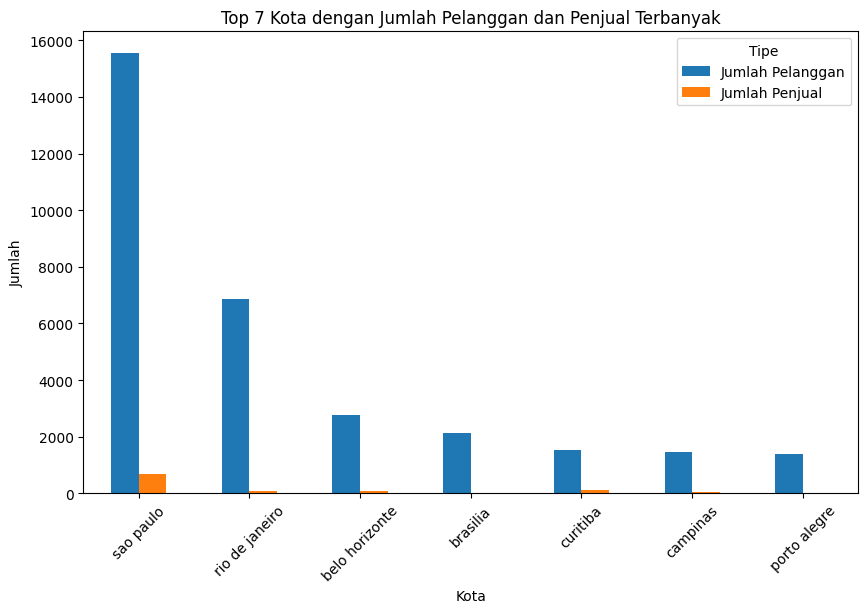

In [141]:
customer_counts = customers_df['customer_city'].value_counts()
seller_counts = sellers_df['seller_city'].value_counts()

merged_counts = pd.concat([customer_counts, seller_counts], axis=1).fillna(0)
merged_counts.columns = ['Jumlah Pelanggan', 'Jumlah Penjual']

merged_counts = merged_counts.sort_values(by=['Jumlah Pelanggan', 'Jumlah Penjual'], ascending=False)

top_7_cities = merged_counts.head(7)

top_7_cities.plot(kind='bar', figsize=(10, 6))
plt.title('Top 7 Kota dengan Jumlah Pelanggan dan Penjual Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Tipe')
plt.show()

Dari hasil di atas, kita dapat melihat bahwa kota sao paulo memiliki jumlah pelanggan dan jumlah penjual terbanyak.

### Pertanyaan 2: Kota mana yang memiliki pelanggan dan seller paling sedikit?

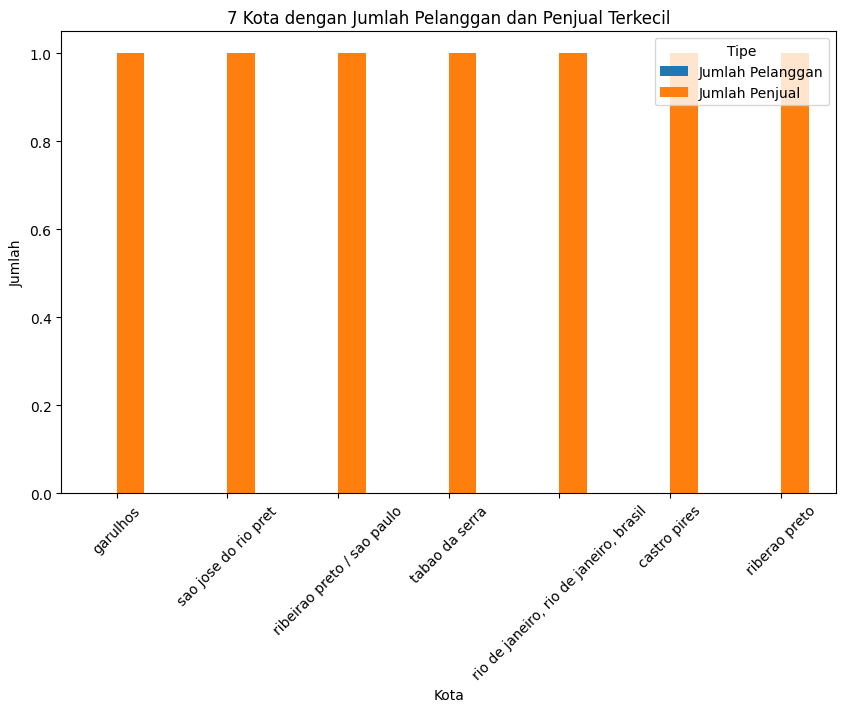

In [143]:
customer_counts = customers_df['customer_city'].value_counts()
seller_counts = sellers_df['seller_city'].value_counts()

merged_counts = pd.concat([customer_counts, seller_counts], axis=1).fillna(0)
merged_counts.columns = ['Jumlah Pelanggan', 'Jumlah Penjual']

merged_counts = merged_counts.sort_values(by=['Jumlah Pelanggan', 'Jumlah Penjual'])

bottom_7_cities = merged_counts.head(7)

bottom_7_cities.plot(kind='bar', figsize=(10, 6))
plt.title('7 Kota dengan Jumlah Pelanggan dan Penjual Terkecil')
plt.xlabel('Kota')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Tipe')
plt.show()

Dari pertanyaan ke dua, Kota-kota di atas memiliki kesamaan yaitu memiliki 1 penjual namun tidak memiliki pelanggan sama sekali.

### Pertanyaan 3: Negara bagian mana yang memiliki pelanggan dan seller paling banyak

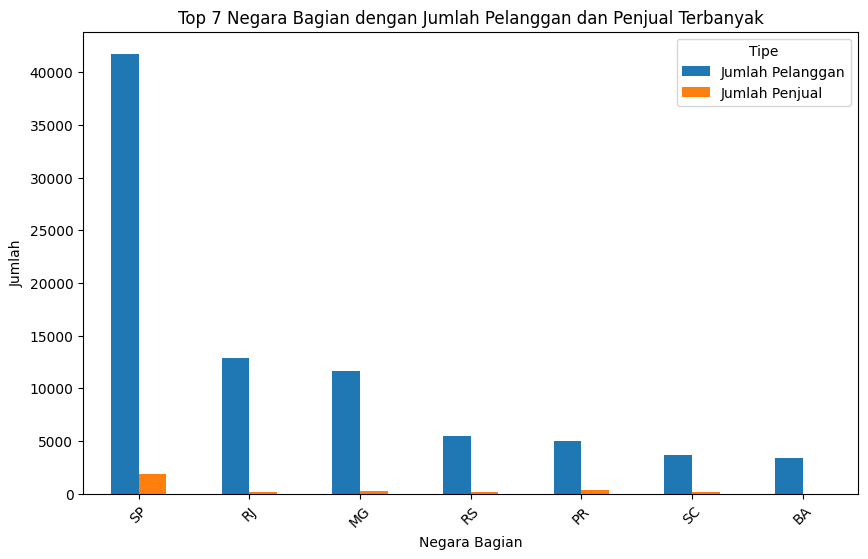

In [145]:
customer_counts = customers_df['customer_state'].value_counts()
seller_counts = sellers_df['seller_state'].value_counts()

merged_counts = pd.concat([customer_counts, seller_counts], axis=1).fillna(0)
merged_counts.columns = ['Jumlah Pelanggan', 'Jumlah Penjual']

merged_counts = merged_counts.sort_values(by=['Jumlah Pelanggan', 'Jumlah Penjual'], ascending=False)

top_7_state = merged_counts.head(7)

top_7_state.plot(kind='bar', figsize=(10, 6))
plt.title('Top 7 Negara Bagian dengan Jumlah Pelanggan dan Penjual Terbanyak')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Tipe')
plt.show()

Dari visualisasi di atas, negara SP merupakan negara yang memiliki pelanggan dan penjual yang banyak.

### Pertanyaan 4: Negara bagian mana yang memiliki pelanggan dan seller paling sedikit?

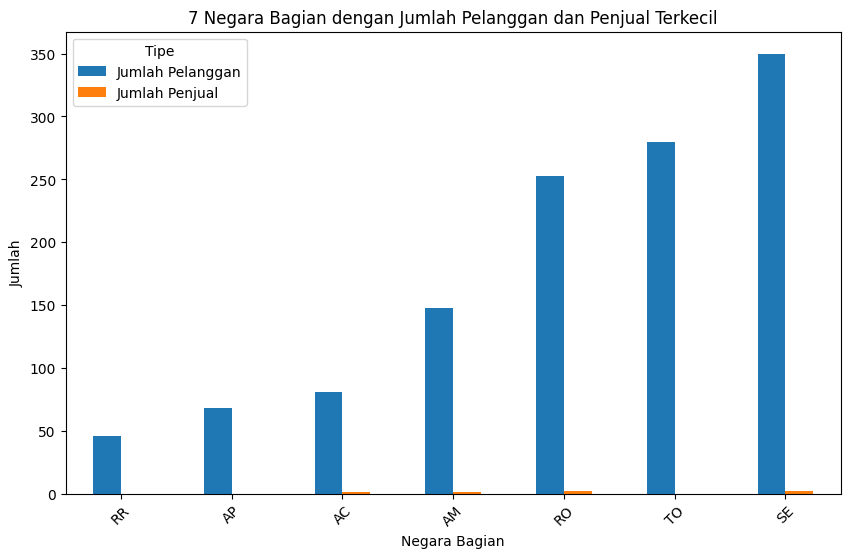

In [144]:
customer_counts = customers_df['customer_state'].value_counts()
seller_counts = sellers_df['seller_state'].value_counts()

merged_counts = pd.concat([customer_counts, seller_counts], axis=1).fillna(0)
merged_counts.columns = ['Jumlah Pelanggan', 'Jumlah Penjual']

merged_counts = merged_counts.sort_values(by=['Jumlah Pelanggan', 'Jumlah Penjual'])

bottom_7_states = merged_counts.head(7)

bottom_7_states.plot(kind='bar', figsize=(10, 6))
plt.title('7 Negara Bagian dengan Jumlah Pelanggan dan Penjual Terkecil')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Tipe')
plt.show()

Negara bagian RR memiliki jumlah pelanggan yang sedikit dibandingkan negara bagian yang lain, bahkan tidak memiiki penjual sama sekali.

### Pertanyaan 5: Berapa lama kelambatan waktu Approval order dilakukan?

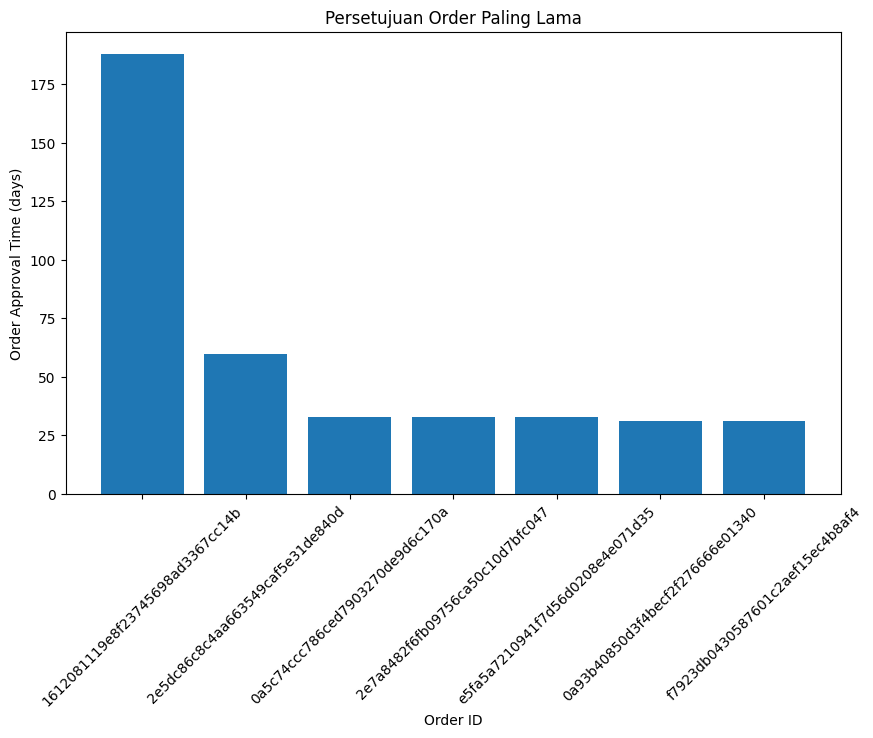

In [150]:
sorted_orders = orders_df.sort_values(by='order_approval_time', ascending=False).head(7)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_orders['order_id'], sorted_orders['order_approval_time'])
plt.xlabel('Order ID')
plt.ylabel('Order Approval Time (days)')
plt.title('Persetujuan Order Paling Lama')
plt.xticks(rotation=45)
plt.show()

Dari hasil di atas, kita dapat melihat bahwa pernah terjadi persetujuan order paling lama yaitu mencapai lebih dari 175

### Pertanyaan 6: Seberapa lambat durasi pengiriman setelah menerima order dilakukan?

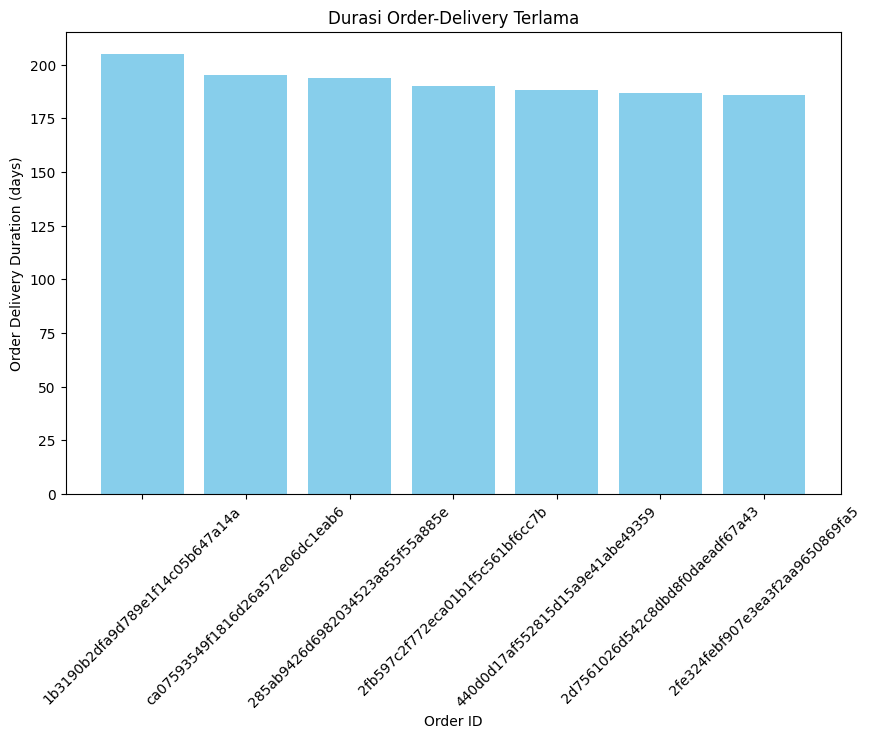

In [152]:
sorted_orders = orders_df.sort_values(by='order_delivery_duration', ascending=False).head(7)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_orders['order_id'], sorted_orders['order_delivery_duration'], color='skyblue')
plt.xlabel('Order ID')
plt.ylabel('Order Delivery Duration (days)')
plt.title('Durasi Order-Delivery Terlama')
plt.xticks(rotation=45)
plt.show()

Dari hasil di atas, kita dapat melihat bahwa perusahaan pernah melakukan pengiriman setelah h+200 menerima order.

### Pertanyaan 7: Dari pengiriman-pengiriman order yang telah dilakukan, apakah pengiriman selalu datang kepada pelanggan tepat waktu sesuai perkiraan?

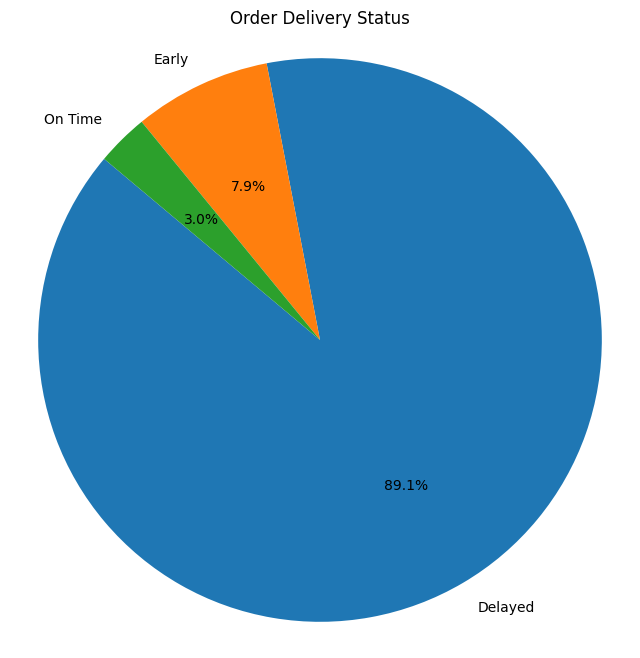

In [153]:
delivery_status_counts = orders_df['order_delivery_status'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Order Delivery Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Dari hasil visualisasi di atas, barang sampai tujuan terlambat dari apa yang sudah diperkirakan.

## Conclusion

### Conclusion Pertanyaan 1

Dari hasil visualisasi di atas, kita dapat melihat perbandingan penjual dan pelanggan yang sangat signifikan. Dalam hal ini, kita dapat melihat bahwasannya kota sao paulo merupakan tempat yang sangat potensial untuk dikembangkan karena minat pelanggan yang cukup tinggi. Kita dapat mengembangkan penjual-penjual dalam kota tersebut untuk menaikkan tren-tren produk sehingga minat pelanggan dapat bertahan dan naik.

### Conclusion Pertanyaan 2

Dari pertanyaan ke dua, rata-rata pada kota di atas memiliki setidaknya 1 penjual. Namun, minat pelanggan dalam kota-kota tersebut masih rendah bahkan sama sekali terdapat pelanggan. Perusahaan harus melatih penjual pada daerah-daerah tersebut agar mereka dapat menjual produk-produk yang ada.

### Conclusion Pertanyaan 3

Dari visualisasi pertanyaan nomor 3, negara bagian SP memiliki kelonjakan jumlah pelanggan yang sangat tinggi dibandingkan negara-negara bagian yang lain.

### Conclusion Pertanyaan 4

Pada hasil visualisasi pertanyaan ke empat, kita dapat melihat bahwa bahkan negara bagian dengan jumlah pelanggan paling sedikit setidaknya memiliki 50 pelanggan. Namun dari negara tersebut, tidak terdapat penjual sama sekali. Yang artinya, pelanggan-pelanggan pada negara tersebut kemungkinan membeli produk di luar negaranya.

Kita dapat meelihat minat pelanggan pada negara RR tersebut, sehingga kita dapat mengembangkan persebaran penjual pada negara tersebut.

### Conclusion Pertanyaan 5

Terjadi persetujuan order paling lama yaitu lebih dari 175 hari. Hal ini dapat disebabkan oleh beberapa hal. Namun, persetujuan yang memakan waktu lebih dari 1 bulan sangat tidak efisien. Dari data di atas, kita dapat tahu bahwa pengecekan order harus dilakukan secara teliti agar tidak terlalu lama melakukan persetujuan order.

### Conclusion Pertanyaan 6

Dari visualisasi data di atas, kita dapat melihat bahwa perusahaan pernah melakukan pengiriman setelah h+200 menerima order. Hal ini tentunya dapat mengecewakan pelanggan karena terlalu lama untuk melakukan pengiriman. Perusahaan perlu mempercepat proses pengiriman setelah mendapatkan order

### Conclusion Pertanyaan 7

Berdasarkan hasil visualisasi yang diberikan, pengiriman barang sampai tujuan lebih banyak terlambat dari waktu perkiraan. Hal ini mungkin dapat disebabkan oleh banyak hal. Perusahaan dapat mempertimbangkan kembali perkiraan waktu pengiriman sampai tujuan.